<a href="https://colab.research.google.com/github/vloneonme/trew/blob/main/san_lr3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

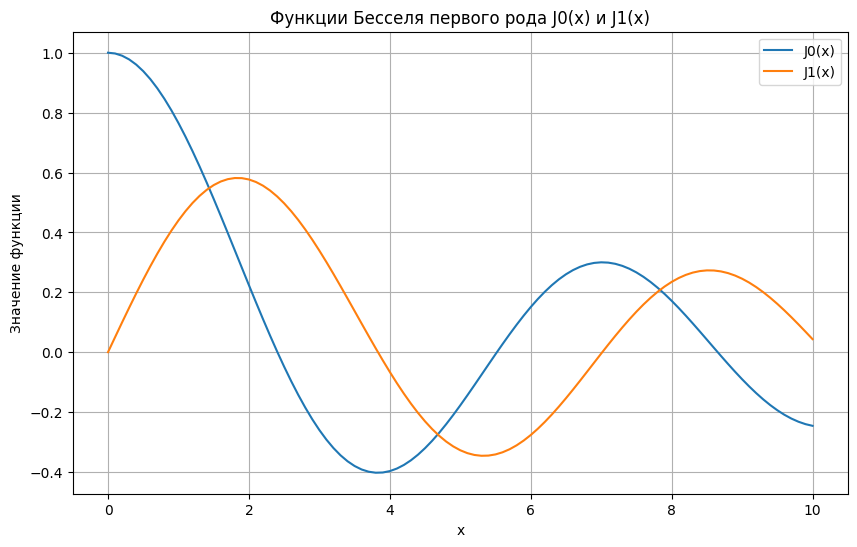

Корни функции J0(x) на отрезке [0, 10]:
[ 2.40482556  5.52007811  8.65372791 11.79153444 14.93091771]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

# Создаем массив значений x от 0 до 10 с шагом 0.1
x = np.arange(0, 10.1, 0.1)

# Вычисляем значения функций Бесселя первого рода J0(x) и J1(x)
J0 = sp.j0(x)
J1 = sp.j1(x)

# Строим графики функций
plt.figure(figsize=(10, 6))
plt.plot(x, J0, label='J0(x)')
plt.plot(x, J1, label='J1(x)')
plt.title('Функции Бесселя первого рода J0(x) и J1(x)')
plt.xlabel('x')
plt.ylabel('Значение функции')
plt.legend()
plt.grid(True)
plt.show()

# Поиск корней функции J0(x) на отрезке [0, 10]
zeros_J0 = sp.jn_zeros(0, 5)  # первые 5 корней J0(x)

print("Корни функции J0(x) на отрезке [0, 10]:")
print(zeros_J0)


Анализ

Функции Бесселя являются колебательными функциями, часто используемыми в задачах физики (волны, теплопроводность, электродинамика).
Функция J0(x) убывает и осциллирует, пересекает ось x в определённых точках — это и есть её корни.

Вывод

Библиотека scipy.special позволяет легко вычислять специальные функции и находить их корни без реализации сложных алгоритмов вручную.

Минимум функции достигается в точке x = -1.1105
Минимальное значение функции f(x) = -3.2464


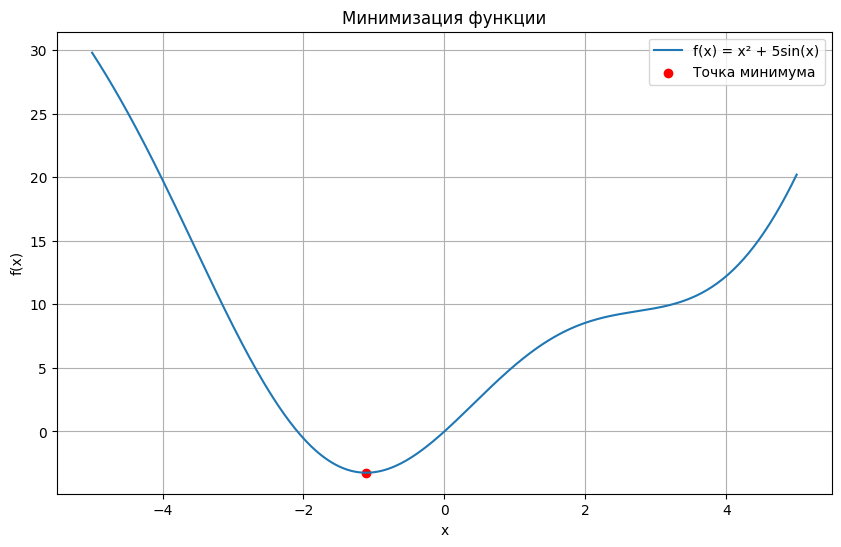

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Определяем функцию
def f(x):
    return x**2 + 5 * np.sin(x)

# Начальное приближение
x0 = 0

# Поиск минимума функции на отрезке [-5, 5]
result = minimize(f, x0, bounds=[(-5, 5)])

x_min = result.x[0]
y_min = f(x_min)

print(f"Минимум функции достигается в точке x = {x_min:.4f}")
print(f"Минимальное значение функции f(x) = {y_min:.4f}")

# Построение графика функции
x_vals = np.linspace(-5, 5, 400)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x) = x² + 5sin(x)')
plt.scatter(x_min, y_min, color='red', label='Точка минимума')
plt.title('Минимизация функции')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


Анализ

Функция имеет нелинейный характер из-за синуса, поэтому аналитически найти минимум сложно.
Метод minimize успешно находит минимум численным способом.

Вывод

SciPy предоставляет мощные инструменты для численной оптимизации функций даже сложной формы.

Среднее значение: 169.51
Медиана: 169.60
Стандартное отклонение: 9.73


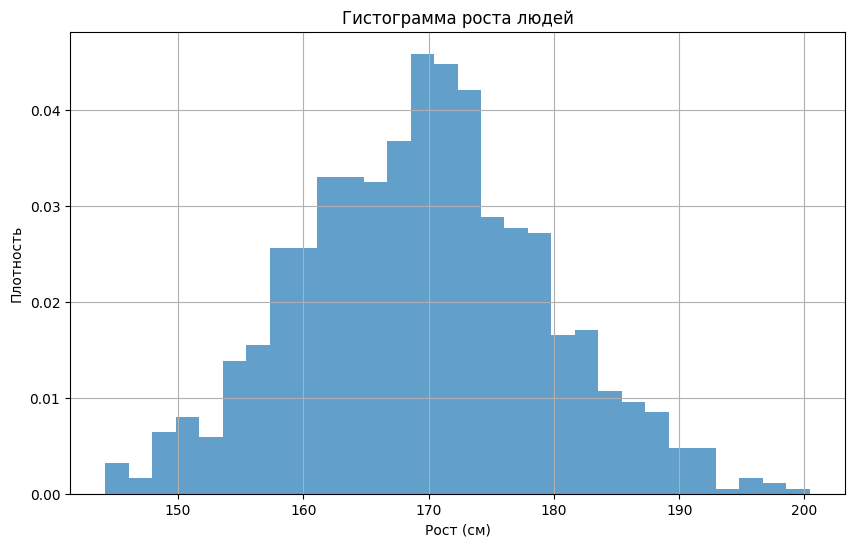

p-value теста Шапиро-Уилка: 0.2636
Гипотеза о нормальном распределении НЕ отвергается


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Генерация случайных данных (рост людей)
data = np.random.normal(170, 10, 1000)

# Вычисление статистических характеристик
mean = np.mean(data)
median = np.median(data)
std = np.std(data)

print(f"Среднее значение: {mean:.2f}")
print(f"Медиана: {median:.2f}")
print(f"Стандартное отклонение: {std:.2f}")

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.7)
plt.title('Гистограмма роста людей')
plt.xlabel('Рост (см)')
plt.ylabel('Плотность')
plt.grid(True)
plt.show()

# Проверка гипотезы о нормальном распределении (тест Шапиро-Уилка)
stat, p_value = stats.shapiro(data[:500])  # берем 500 значений для корректности

print(f"p-value теста Шапиро-Уилка: {p_value:.4f}")

if p_value > 0.05:
    print("Гипотеза о нормальном распределении НЕ отвергается")
else:
    print("Гипотеза о нормальном распределении отвергается")


Анализ

Данные были сгенерированы из нормального распределения, что подтверждается:

формой гистограммы,

результатами статистического теста.

Вывод

SciPy позволяет проводить полный статистический анализ данных и проверять гипотезы.

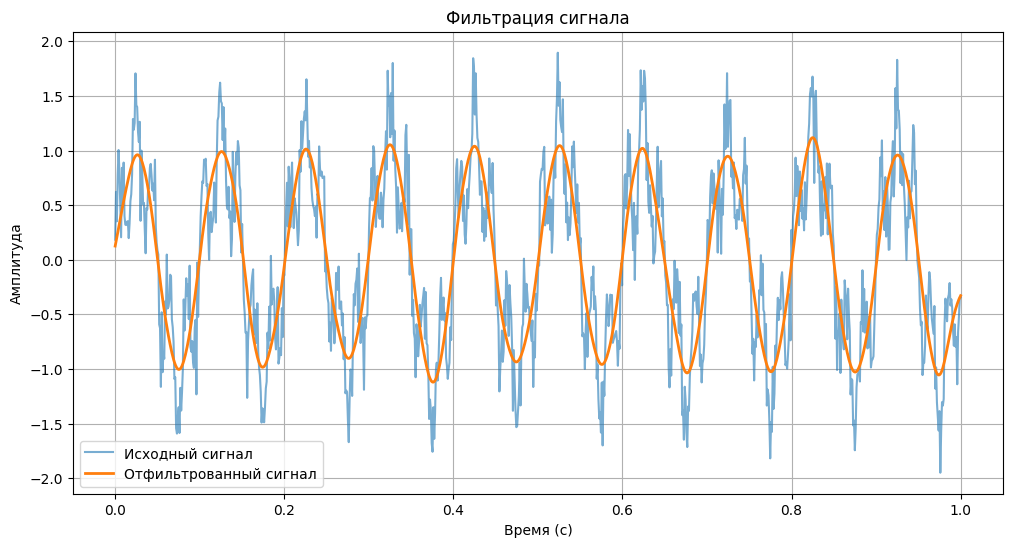

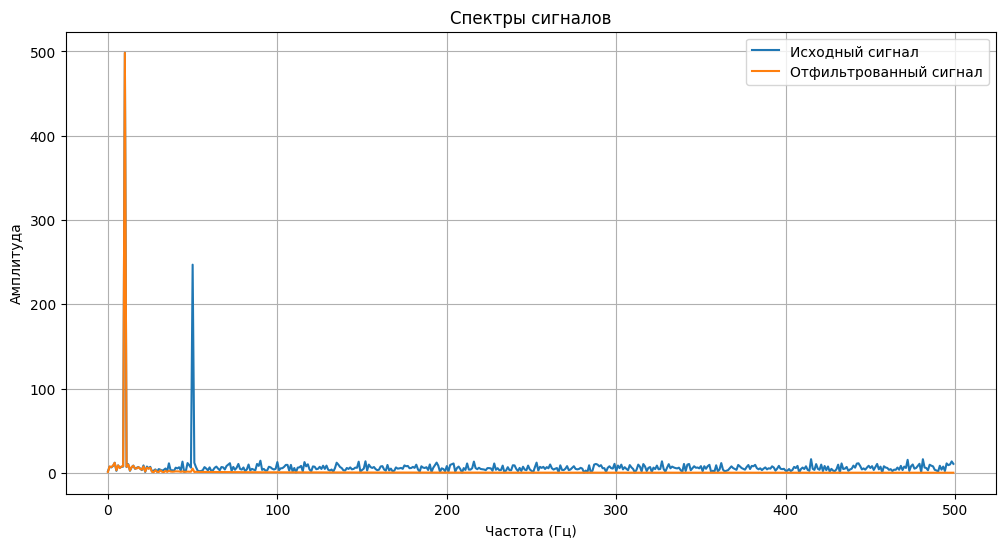

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Создание временной оси
t = np.linspace(0, 1, 1000)

# Создание сигнала с шумом
sig = (np.sin(2*np.pi*10*t) +
       0.5*np.sin(2*np.pi*50*t) +
       0.2*np.random.randn(1000))

# Параметры фильтра Баттерворта
fs = 1000  # частота дискретизации
cutoff = 30  # частота среза
order = 4

# Создание фильтра
b, a = signal.butter(order, cutoff, fs=fs, btype='low')

# Фильтрация сигнала
filtered_sig = signal.filtfilt(b, a, sig)

# Построение сигналов
plt.figure(figsize=(12, 6))
plt.plot(t, sig, label='Исходный сигнал', alpha=0.6)
plt.plot(t, filtered_sig, label='Отфильтрованный сигнал', linewidth=2)
plt.title('Фильтрация сигнала')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)
plt.show()

# Спектры сигналов
fft_sig = np.abs(np.fft.fft(sig))
fft_filt = np.abs(np.fft.fft(filtered_sig))
freqs = np.fft.fftfreq(len(fft_sig), 1/fs)

plt.figure(figsize=(12, 6))
plt.plot(freqs[:500], fft_sig[:500], label='Исходный сигнал')
plt.plot(freqs[:500], fft_filt[:500], label='Отфильтрованный сигнал')
plt.title('Спектры сигналов')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)
plt.show()


Анализ

Высокочастотная составляющая (50 Гц) была успешно подавлена фильтром низких частот.

Вывод

SciPy эффективен для цифровой обработки сигналов и анализа частотных характеристик.

In [5]:
import numpy as np
from scipy.interpolate import interp1d

# Исходные данные
x = np.array([0, 1, 2, 3, 4, 5])
y = x**2

# Создание интерполяционных функций
linear_interp = interp1d(x, y, kind='linear')
cubic_interp = interp1d(x, y, kind='cubic')

# Новые точки
x_new = np.array([0.5, 1.5, 2.5, 3.5, 4.5])

# Вычисление значений
y_linear = linear_interp(x_new)
y_cubic = cubic_interp(x_new)
y_true = x_new**2

# Вывод результатов
print("x\tИстинное\tЛинейная\tКубическая")
for i in range(len(x_new)):
    print(f"{x_new[i]:.1f}\t{y_true[i]:.2f}\t\t{y_linear[i]:.2f}\t\t{y_cubic[i]:.2f}")


x	Истинное	Линейная	Кубическая
0.5	0.25		0.50		0.25
1.5	2.25		2.50		2.25
2.5	6.25		6.50		6.25
3.5	12.25		12.50		12.25
4.5	20.25		20.50		20.25


Анализ

Линейная интерполяция даёт приближённые значения, а кубическая почти полностью совпадает с истинной функцией.

Вывод

Методы интерполяции SciPy позволяют точно восстанавливать значения между узлами данных.

Общий вывод по работе

В ходе практической работы была изучена библиотека SciPy, которая предоставляет инструменты для:

математического анализа,

оптимизации,

статистики,

обработки сигналов,

интерполяции данных.

SciPy является мощным инструментом научных вычислений и широко применяется в инженерных и исследовательских задачах.